## Topic : D-Mart sales Prediction 

__The goal of this project is to predict the Total Order Value of purchases made on the D-Mart platform using historical sales data. The dataset includes features related to product pricing, discounts, customer demographics, website interactions, and delivery timelines. By building a regression-based machine learning model, the project aims to estimate the total value of individual orders based on these influencing factors, helping D-Mart optimize pricing strategies, improve operational efficiency, and better understand sales drivers.__

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("fully_uncleaned_dmart_sales.csv")
df.head()

,Customer ID,Product ID,Order ID,Customer Age,Gender,Product Name,MRP,Discount Price,Category,State,...,Order Date,Delivery Date,Payment Method,Pin Code,Total Order Value,Payment Status,No of Clicks,Year,Month,Shipping Charges
0,YSB75,BW653,479577309.0,28.0,Female,Ariel Matic Top Load Liquid Detergent,977.44,909.02,Imported,Andhra Pradesh,...,05-05-2022,13-05-2022,Credit,318324.0,909.02,Paid,29.0,2022.0,May,0
1,FUS93,XV061,634865221.0,47.0,Male,VSR Channa Dal,834.09,450.41,Branded,Telangana,...,13-08-2021,20-08-2021,Debit,730162.0,450.41,Paid,95.0,2021.0,August,0
2,AJP28,GF695,113166210.0,63.0,Female,Tenali Double Horse Chana Dal,1095.20,1007.58,Branded,Gujarat,...,17-10-2021,26-10-2021,Debit,694091.0,1007.58,Paid,51.0,2021.0,October,0
3,URC55,VM478,740539230.0,41.0,Male,Tata Tea,748.16,389.04,Imported,Maharashtra,...,25-08-2021,27-08-2021,Credit,211807.0,489.04,Pending,12.0,2021.0,August,100
4,ZOP23,XD230,156544145.0,22.0,Female,VSR Channa Dal,1249.04,911.80,Local,Gujarat,...,08-12-2023,10-12-2023,Credit,78304.0,1011.8,Paid,26.0,2023.0,December,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              25000 non-null  object 
 1   Product ID               25000 non-null  object 
 2   Order ID                 24999 non-null  float64
 3   Customer Age             24786 non-null  float64
 4   Gender                   24889 non-null  object 
 5   Product Name             24892 non-null  object 
 6   MRP                      24892 non-null  float64
 7   Discount Price           24888 non-null  float64
 8   Category                 24878 non-null  object 
 9   State                    24887 non-null  object 
 10  City                     24888 non-null  object 
 11  Subscription             24890 non-null  object 
 12  Time Spent on Website    24881 non-null  float64
 13  Rating                   24884 non-null  float64
 14  Marketing/Advertisemen

__Shape of the Dataset__

In [4]:
df.shape

(25000, 27)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,24999.0,4.987170e+08,2.881945e+08,19128.00,2.503549e+08,4.997343e+08,7.471221e+08,9.999131e+08
Customer Age,24786.0,4.384499e+01,1.529428e+01,18.00,3.100000e+01,4.400000e+01,5.700000e+01,7.000000e+01
MRP,24892.0,1.013752e+03,5.708948e+02,20.04,5.240425e+02,1.014400e+03,1.506620e+03,1.999920e+03
Discount Price,24888.0,7.354548e+02,4.413893e+02,10.91,3.675575e+02,7.129400e+02,1.061347e+03,1.876220e+03
Time Spent on Website,24881.0,1.014195e+01,1.096100e+01,1.00,2.980000e+00,5.000000e+00,1.342000e+01,5.997000e+01
Rating,24884.0,3.008274e+00,1.159897e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Pin Code,24998.0,4.967360e+05,2.877239e+05,5.00,2.479920e+05,4.952155e+05,7.458270e+05,9.999970e+05
No of Clicks,24889.0,5.040930e+01,2.886420e+01,1.00,2.600000e+01,5.000000e+01,7.600000e+01,1.000000e+02
Year,24897.0,2.022002e+03,8.167554e-01,2021.00,2.021000e+03,2.022000e+03,2.023000e+03,2.023000e+03


In [6]:
df.columns

Index(['Customer ID', 'Product ID', 'Order ID', 'Customer Age', 'Gender',
       'Product Name', 'MRP', 'Discount Price', 'Category', 'State', 'City',
       'Subscription', 'Time Spent on Website', 'Rating',
       'Marketing/Advertisement', 'Ship Mode', 'Order Status', 'Order Date',
       'Delivery Date', 'Payment Method', 'Pin Code', 'Total Order Value',
       'Payment Status', 'No of Clicks', 'Year', 'Month', 'Shipping Charges'],
      dtype='object')

### Checking for Null Values

In [7]:
df.isnull().sum()

Customer ID                  0
Product ID                   0
Order ID                     1
Customer Age               214
Gender                     111
Product Name               108
MRP                        108
Discount Price             112
Category                   122
State                      113
City                       112
Subscription               110
Time Spent on Website      119
Rating                     116
Marketing/Advertisement    119
Ship Mode                  122
Order Status               117
Order Date                 107
Delivery Date              100
Payment Method             112
Pin Code                     2
Total Order Value          222
Payment Status             123
No of Clicks               111
Year                       103
Month                      111
Shipping Charges           223
dtype: int64

### Data Cleaning

In [8]:
# Handling Missing Values
for col in df.columns:
    if df[col].isnull().sum() / df.shape[0] > 0.3:
        df.drop(columns=[col], inplace=True)  # Drop columns with >30% missing values
    else:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
        else:
            df[col].fillna(df[col].median(), inplace=True)  # Fill numerical with median

In [9]:
df.isnull().sum()

Customer ID                0
Product ID                 0
Order ID                   0
Customer Age               0
Gender                     0
Product Name               0
MRP                        0
Discount Price             0
Category                   0
State                      0
City                       0
Subscription               0
Time Spent on Website      0
Rating                     0
Marketing/Advertisement    0
Ship Mode                  0
Order Status               0
Order Date                 0
Delivery Date              0
Payment Method             0
Pin Code                   0
Total Order Value          0
Payment Status             0
No of Clicks               0
Year                       0
Month                      0
Shipping Charges           0
dtype: int64

In [10]:
df.dtypes

Customer ID                 object
Product ID                  object
Order ID                   float64
Customer Age               float64
Gender                      object
Product Name                object
MRP                        float64
Discount Price             float64
Category                    object
State                       object
City                        object
Subscription                object
Time Spent on Website      float64
Rating                     float64
Marketing/Advertisement     object
Ship Mode                   object
Order Status                object
Order Date                  object
Delivery Date               object
Payment Method              object
Pin Code                   float64
Total Order Value           object
Payment Status              object
No of Clicks               float64
Year                       float64
Month                       object
Shipping Charges            object
dtype: object

### Converting Data set columns

In [11]:
# Convert date columns to datetime format
date_cols = ["Order Date", "Delivery Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\vishw\AppData\Local\Temp\ipykernel_20148\2410585947.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\vishw\AppData\Local\Temp\ipykernel_20148\2410585947.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [12]:
# Convert necessary columns to numeric before feature engineering
numeric_cols = [
    "Total Order Value", "MRP", "Discount Price", 
    "Shipping Charges", "No of Clicks"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


### Checking for Outliers

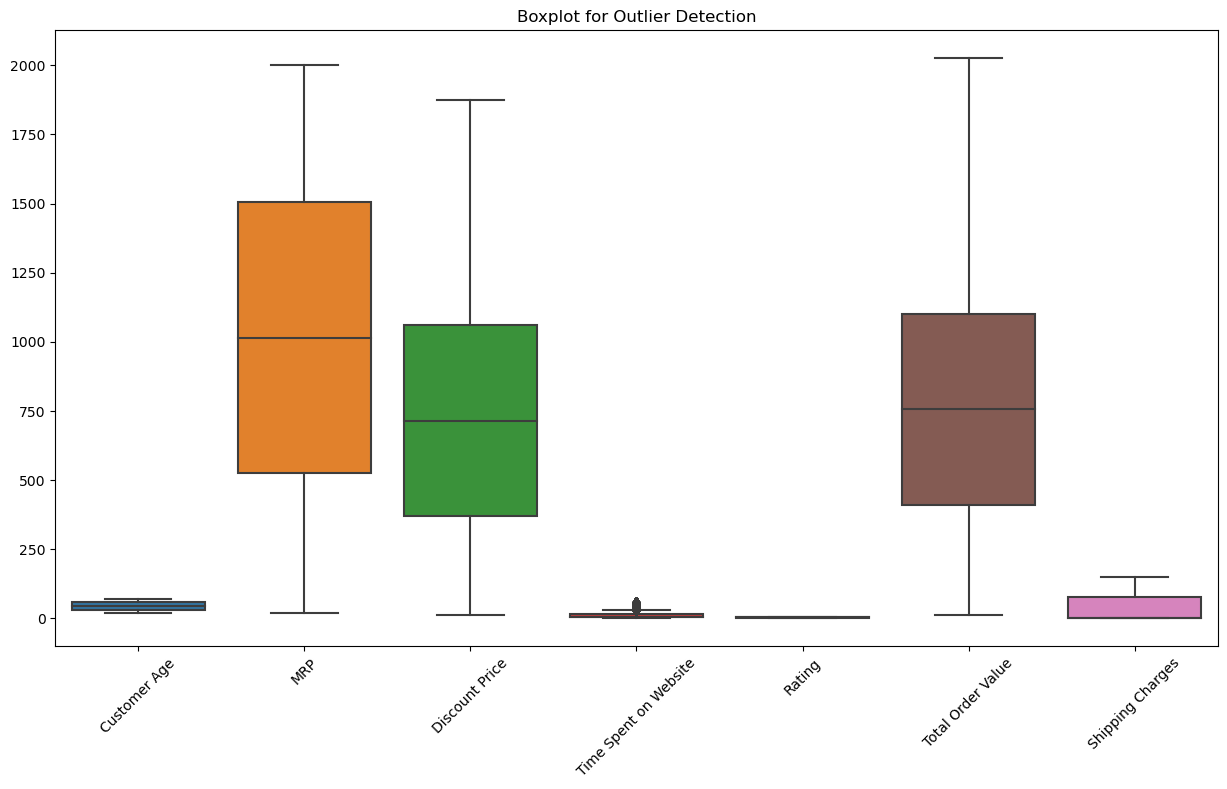

In [13]:
# Detecting Outliers using Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[["Customer Age", "MRP", "Discount Price", "Time Spent on Website", 
                             "Rating", "Total Order Value", "Shipping Charges"]])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [14]:
#Handling Outliers using IQR method
for col in ["Customer Age", "MRP", "Discount Price", "Time Spent on Website", "Rating", "Total Order Value", "Shipping Charges"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## Adding new Features

In [15]:
# Time-Based added Feature coluumns
df["Order Processing Time"] = (df["Delivery Date"] - df["Order Date"]).dt.days  # Delivery time in days
df["Order Month"] = df["Order Date"].dt.month  # Extract month
df["Order Year"] = df["Order Date"].dt.year  # Extract year
df["Is Weekend Order"] = df["Order Date"].dt.dayofweek >= 5  # True if order was placed on a weekend

# Interaction Feature columns
df["Discount Percentage"] = (df["Discount Price"] / df["MRP"]) * 100  # Discount %
df["Clicks-to-Spent Ratio"] = df["Total Order Value"] / (df["No of Clicks"] + 1)  # Avoid division by zero
df["Revenue Per Click"] = df["Total Order Value"] / (df["No of Clicks"] + 1)

df["Discounted Price"] = df["MRP"] - df["Discount Price"]  # Actual selling price after discount

df["Shipping Cost Percentage"] = (df["Shipping Charges"] / df["Total Order Value"]) * 100  # % of total cost spent on shipping

In [16]:
df[["Order Processing Time", "Order Month", "Order Year", "Is Weekend Order",
    "Discount Percentage", "Clicks-to-Spent Ratio", "Revenue Per Click",
    "Discounted Price", "Shipping Cost Percentage"]].head()


,Order Processing Time,Order Month,Order Year,Is Weekend Order,Discount Percentage,Clicks-to-Spent Ratio,Revenue Per Click,Discounted Price,Shipping Cost Percentage
0,8,5,2022,False,93.000082,30.300667,30.300667,68.42,0.000000
1,7,8,2021,False,54.000168,4.691771,4.691771,383.68,0.000000
2,9,10,2021,True,91.999635,19.376538,19.376538,87.62,0.000000
3,2,8,2021,False,51.999572,37.618462,37.618462,359.12,20.448225
4,61,8,2023,True,73.000064,37.474074,37.474074,337.24,9.883376


### Data Visualization

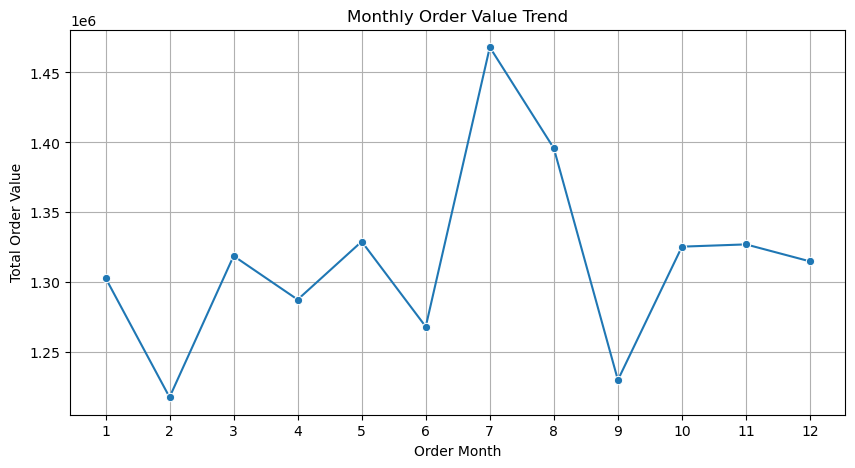

In [17]:
monthly_orders = df.groupby("Order Month")["Total Order Value"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_orders, x='Order Month', y='Total Order Value', marker='o')
plt.title("Monthly Order Value Trend")
plt.xticks(range(1,13))
plt.grid()
plt.show()


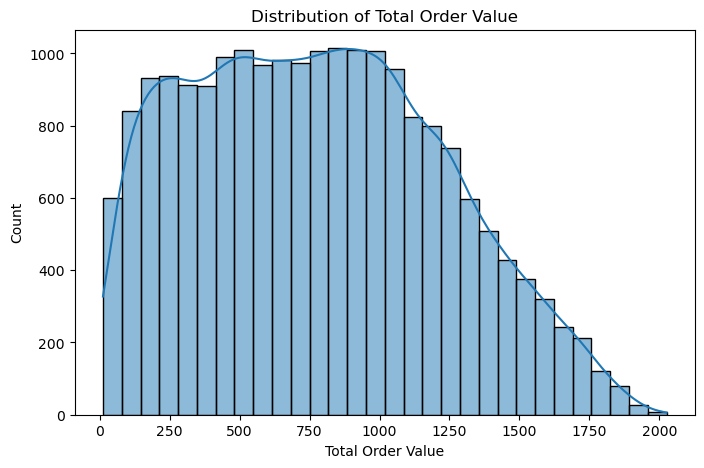

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total Order Value'], kde=True, bins=30)
plt.title("Distribution of Total Order Value")
plt.show()


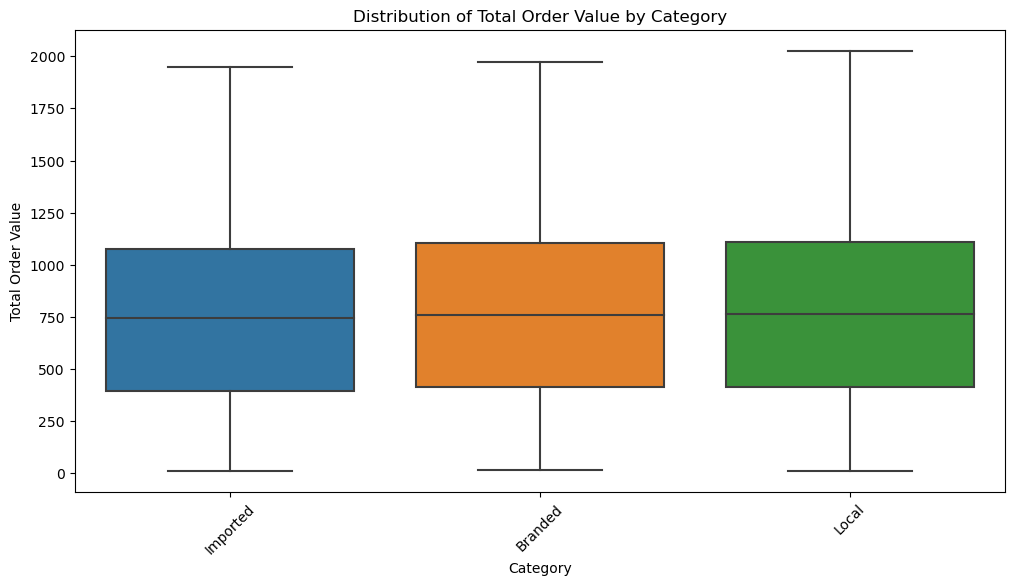

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Total Order Value')
plt.title("Distribution of Total Order Value by Category")
plt.xticks(rotation=45)
plt.show()


In [20]:
df.dtypes

Customer ID                         object
Product ID                          object
Order ID                           float64
Customer Age                       float64
Gender                              object
Product Name                        object
MRP                                float64
Discount Price                     float64
Category                            object
State                               object
City                                object
Subscription                        object
Time Spent on Website              float64
Rating                             float64
Marketing/Advertisement             object
Ship Mode                           object
Order Status                        object
Order Date                  datetime64[ns]
Delivery Date               datetime64[ns]
Payment Method                      object
Pin Code                           float64
Total Order Value                  float64
Payment Status                      object
No of Click

### Droping columns

In [21]:
# Remove irrelevant columns (Unique Identifiers)
irrelevant_cols = ["Customer ID", "Product ID", "Order ID", "Pin Code","Product Name","Order Date","Delivery Date"]
df.drop(columns=[col for col in irrelevant_cols if col in df.columns], inplace=True, errors='ignore')
df.head()
df.shape

(20331, 29)

## Feature Selection

C:\Users\vishw\AppData\Local\Temp\ipykernel_20148\2980471777.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


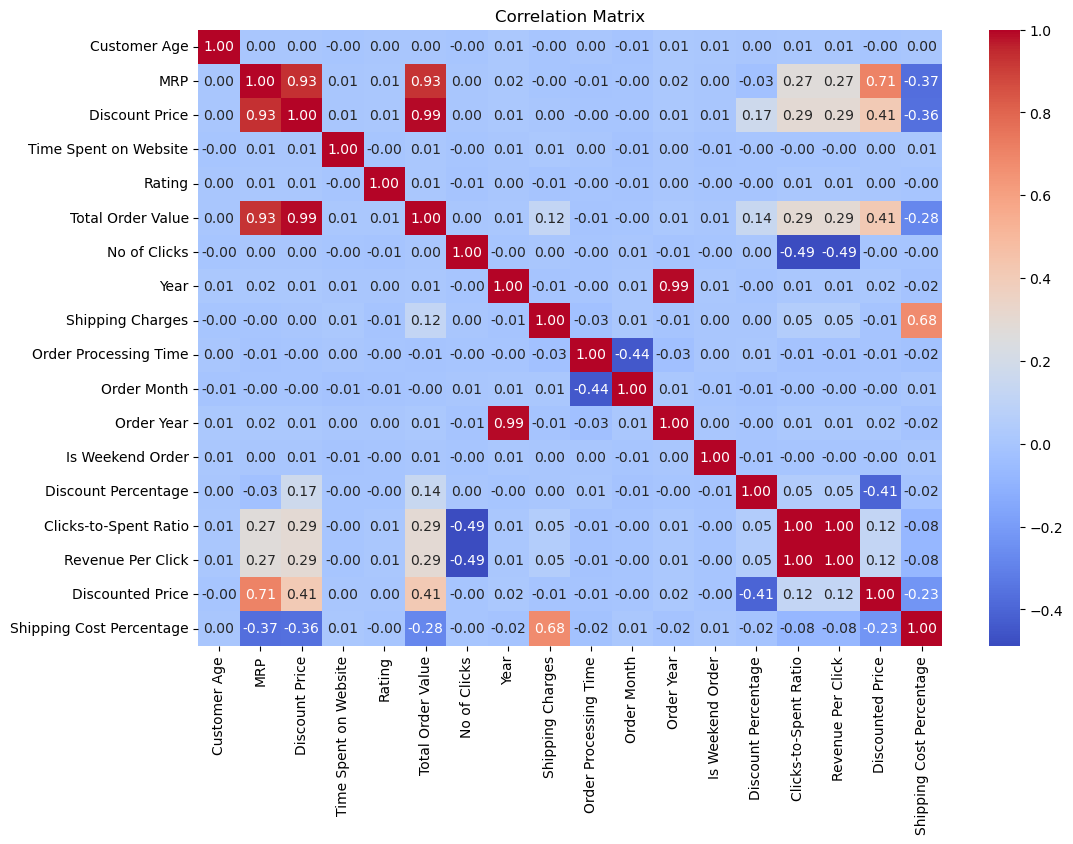

In [22]:
# Feature Selection - Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [23]:
df.drop(columns=[
    "MRP",
    "Discount Price",
    "Clicks-to-Spent Ratio"
], inplace=True)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ["Gender", "Subscription", "Payment Status", "Is Weekend Order","Month"]
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
nominal_cols = [
    "Category", "State", "City",
    "Marketing/Advertisement", "Ship Mode",
    "Payment Method", "Order Status"
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [26]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

Customer Age                         float64
Gender                                 int32
Subscription                           int32
Time Spent on Website                float64
Rating                               float64
Total Order Value                    float64
Payment Status                         int32
No of Clicks                         float64
Year                                 float64
Month                                  int32
Shipping Charges                     float64
Order Processing Time                  int64
Order Month                            int64
Order Year                             int64
Is Weekend Order                       int64
Discount Percentage                  float64
Revenue Per Click                    float64
Discounted Price                     float64
Shipping Cost Percentage             float64
Category_Imported                      uint8
Category_Local                         uint8
State_Gujarat                          uint8
State_Maha

__Min Max Scaling__

In [27]:
numerical_cols = [
    'Customer Age', 'MRP', 'Discount Price', 'Time Spent on Website',
    'Rating', 'No of Clicks', 'Shipping Charges','Total Order Value'
    'Order Processing Time', 'Discount Percentage', 'Clicks-to-Spent Ratio',
    'Revenue Per Click', 'Discounted Price', 'Shipping Cost Percentage'
]
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Age,20331.0,0.496490,0.292574,0.0,0.250000,0.500000,0.750000,1.0
Time Spent on Website,20331.0,0.250244,0.250467,0.0,0.066595,0.134622,0.385965,1.0
Rating,20331.0,0.502279,0.288937,0.0,0.250000,0.500000,0.750000,1.0
Total Order Value,20331.0,0.379732,0.220764,0.0,0.198502,0.370531,0.540992,1.0
No of Clicks,20331.0,0.497560,0.290642,0.0,0.252525,0.494949,0.747475,1.0
Year,20331.0,0.501746,0.406519,0.0,0.000000,0.500000,1.000000,1.0
Shipping Charges,20331.0,0.262407,0.349290,0.0,0.000000,0.000000,0.500000,1.0
Order Processing Time,20331.0,0.461854,0.064547,0.0,0.447275,0.461538,0.489047,1.0
Order Month,20331.0,0.503843,0.312015,0.0,0.272727,0.545455,0.818182,1.0
Order Year,20331.0,0.503886,0.407667,0.0,0.000000,0.500000,1.000000,1.0


## ML
### Assidning Target Variable

In [29]:
target = 'Total Order Value'  # Or your chosen prediction target
X = df.drop(columns=[target])
y = df[target]

### Linear regression model

In [30]:
# Split the data (assuming X and y are already defined and preprocessed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Performance:
MAE: 0.12
RMSE: 0.17
R² Score: 0.4111


## Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")


Gradient Boosting Regressor Performance:
R² Score: 0.9795
RMSE: 0.03
MAE: 0.02


## Random Forest Regressor

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.9970
RMSE: 0.01
MAE: 0.01


### Train VS Test

In [33]:
train_r2 = r2_score(y_train, rf_model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Train R²: 0.9994, Test R²: 0.9970


## Cross-Validation

In [34]:

# Define model again to use in CV (no need to refit manually)
rf_cv_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# 5-fold cross-validation using R²
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.9962476  0.99582019 0.99516407 0.99611031 0.99529574]
Average R² Score: 0.9957275839268087


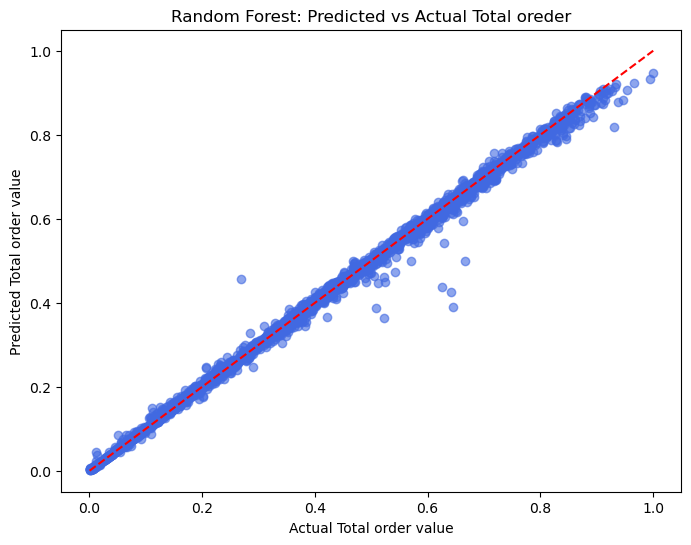

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Total order value")
plt.ylabel("Predicted Total order value")
plt.title("Random Forest: Predicted vs Actual Total oreder")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


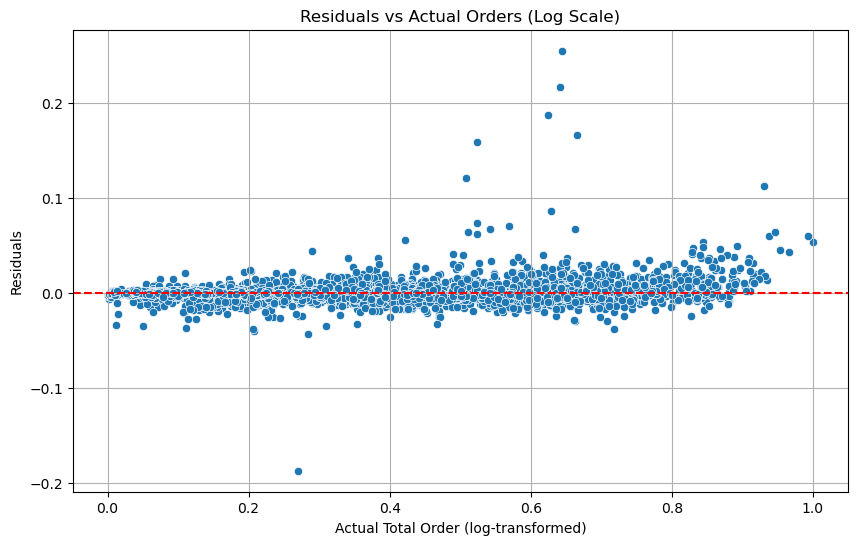

In [36]:
# Residuals
residuals = y_test - y_pred  # use y_pred for Random Forest predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual Orders (Log Scale)")
plt.xlabel("Actual Total Order (log-transformed)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## Conclusion

__In this project, we successfully developed a regression model to predict the Total Order Value of D-Mart transactions using cleaned and feature-engineered historical sales data. By applying models like Linear Regression, Gradient Boosting, and Random Forest, we identified key factors influencing order value, such as discounts, shipping charges, customer behavior, and product details. Among these, the Random Forest model achieved the best performance with a strong R² score and low error rates, indicating reliable predictive capability. These insights can help D-Mart make data-driven decisions for pricing, promotions, and customer targeting to enhance sales and operational efficiency.__